## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

In [ ]:
!nvidia-smi

Tue Jun 18 09:37:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 30.6/225.8 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="MGNI75by7gRbXyzKosPI")
project = rf.workspace("shixuamws").project("basketball_game-ra7ml")
version = project.version(6)
dataset = version.download("yolov8")



mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=60 imgsz=640

/content
New https://pypi.org/project/ultralytics/8.2.43 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/datasets/BasketBall_Game-6/data.yaml, epochs=60, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visual

/content


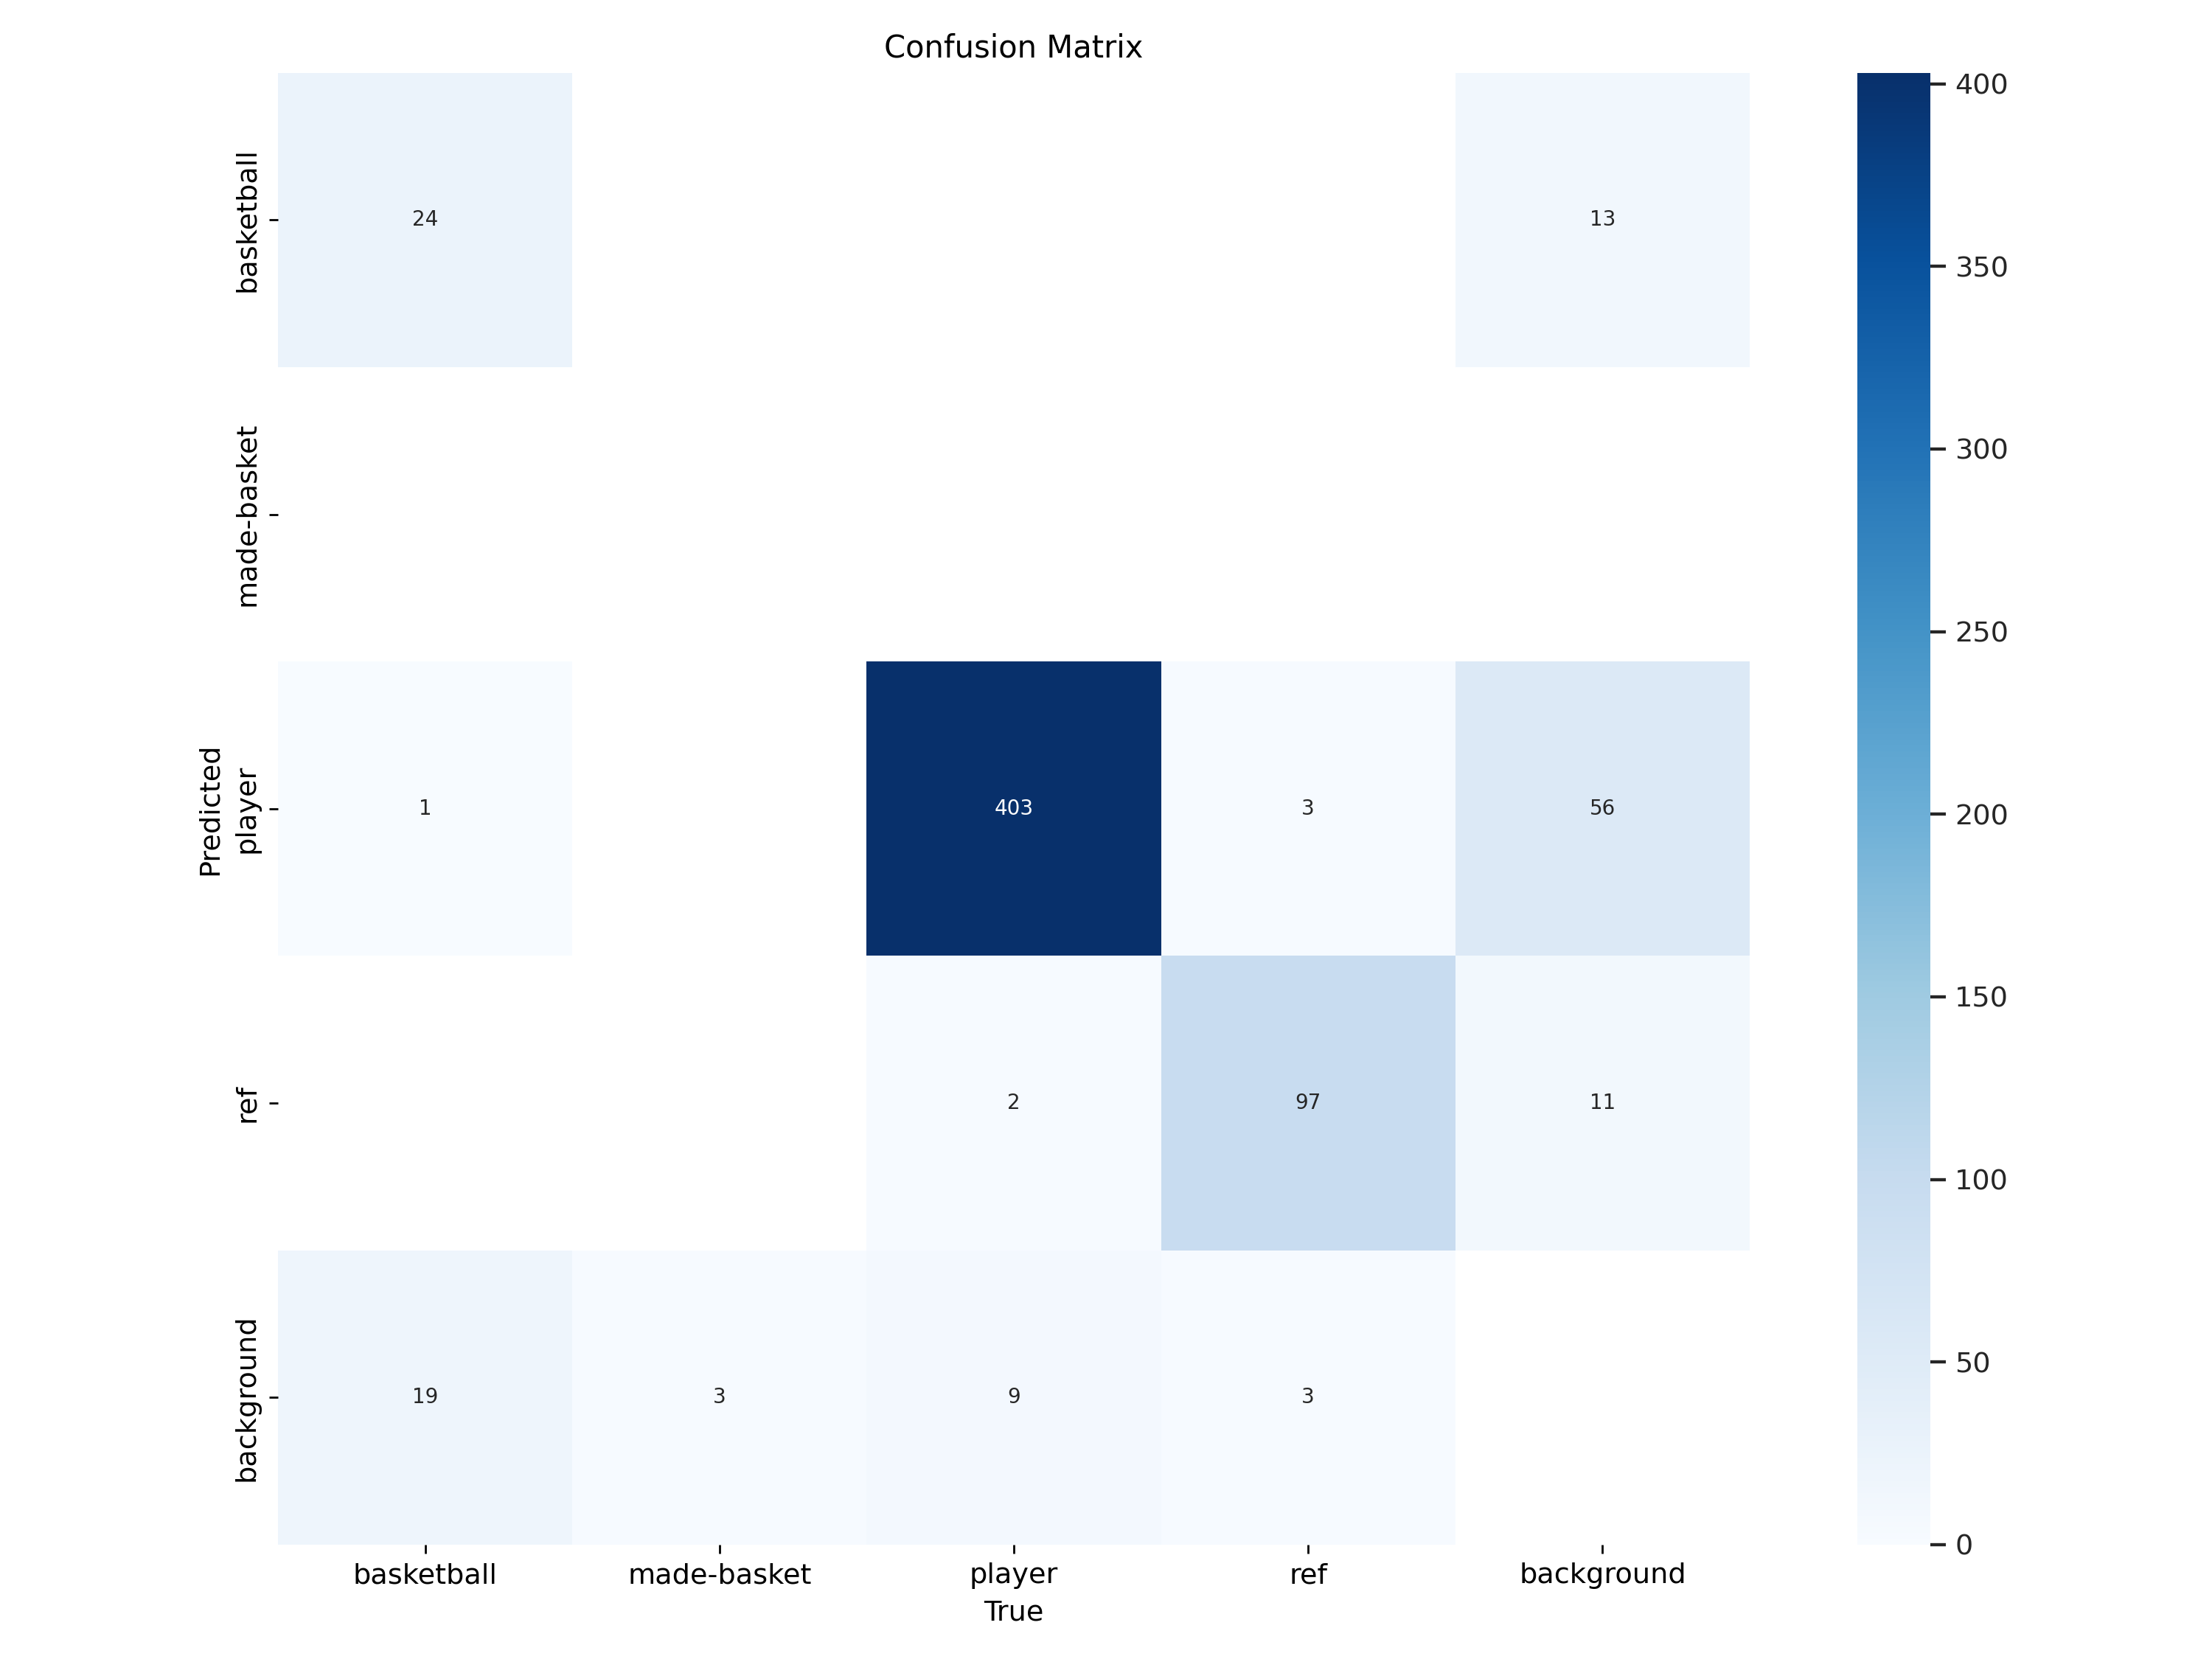

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train2/results.png', width=600)

/content


FileNotFoundError: [Errno 2] No such file or directory: '/content/datasets/runs/detect/train2/results.png'

/content


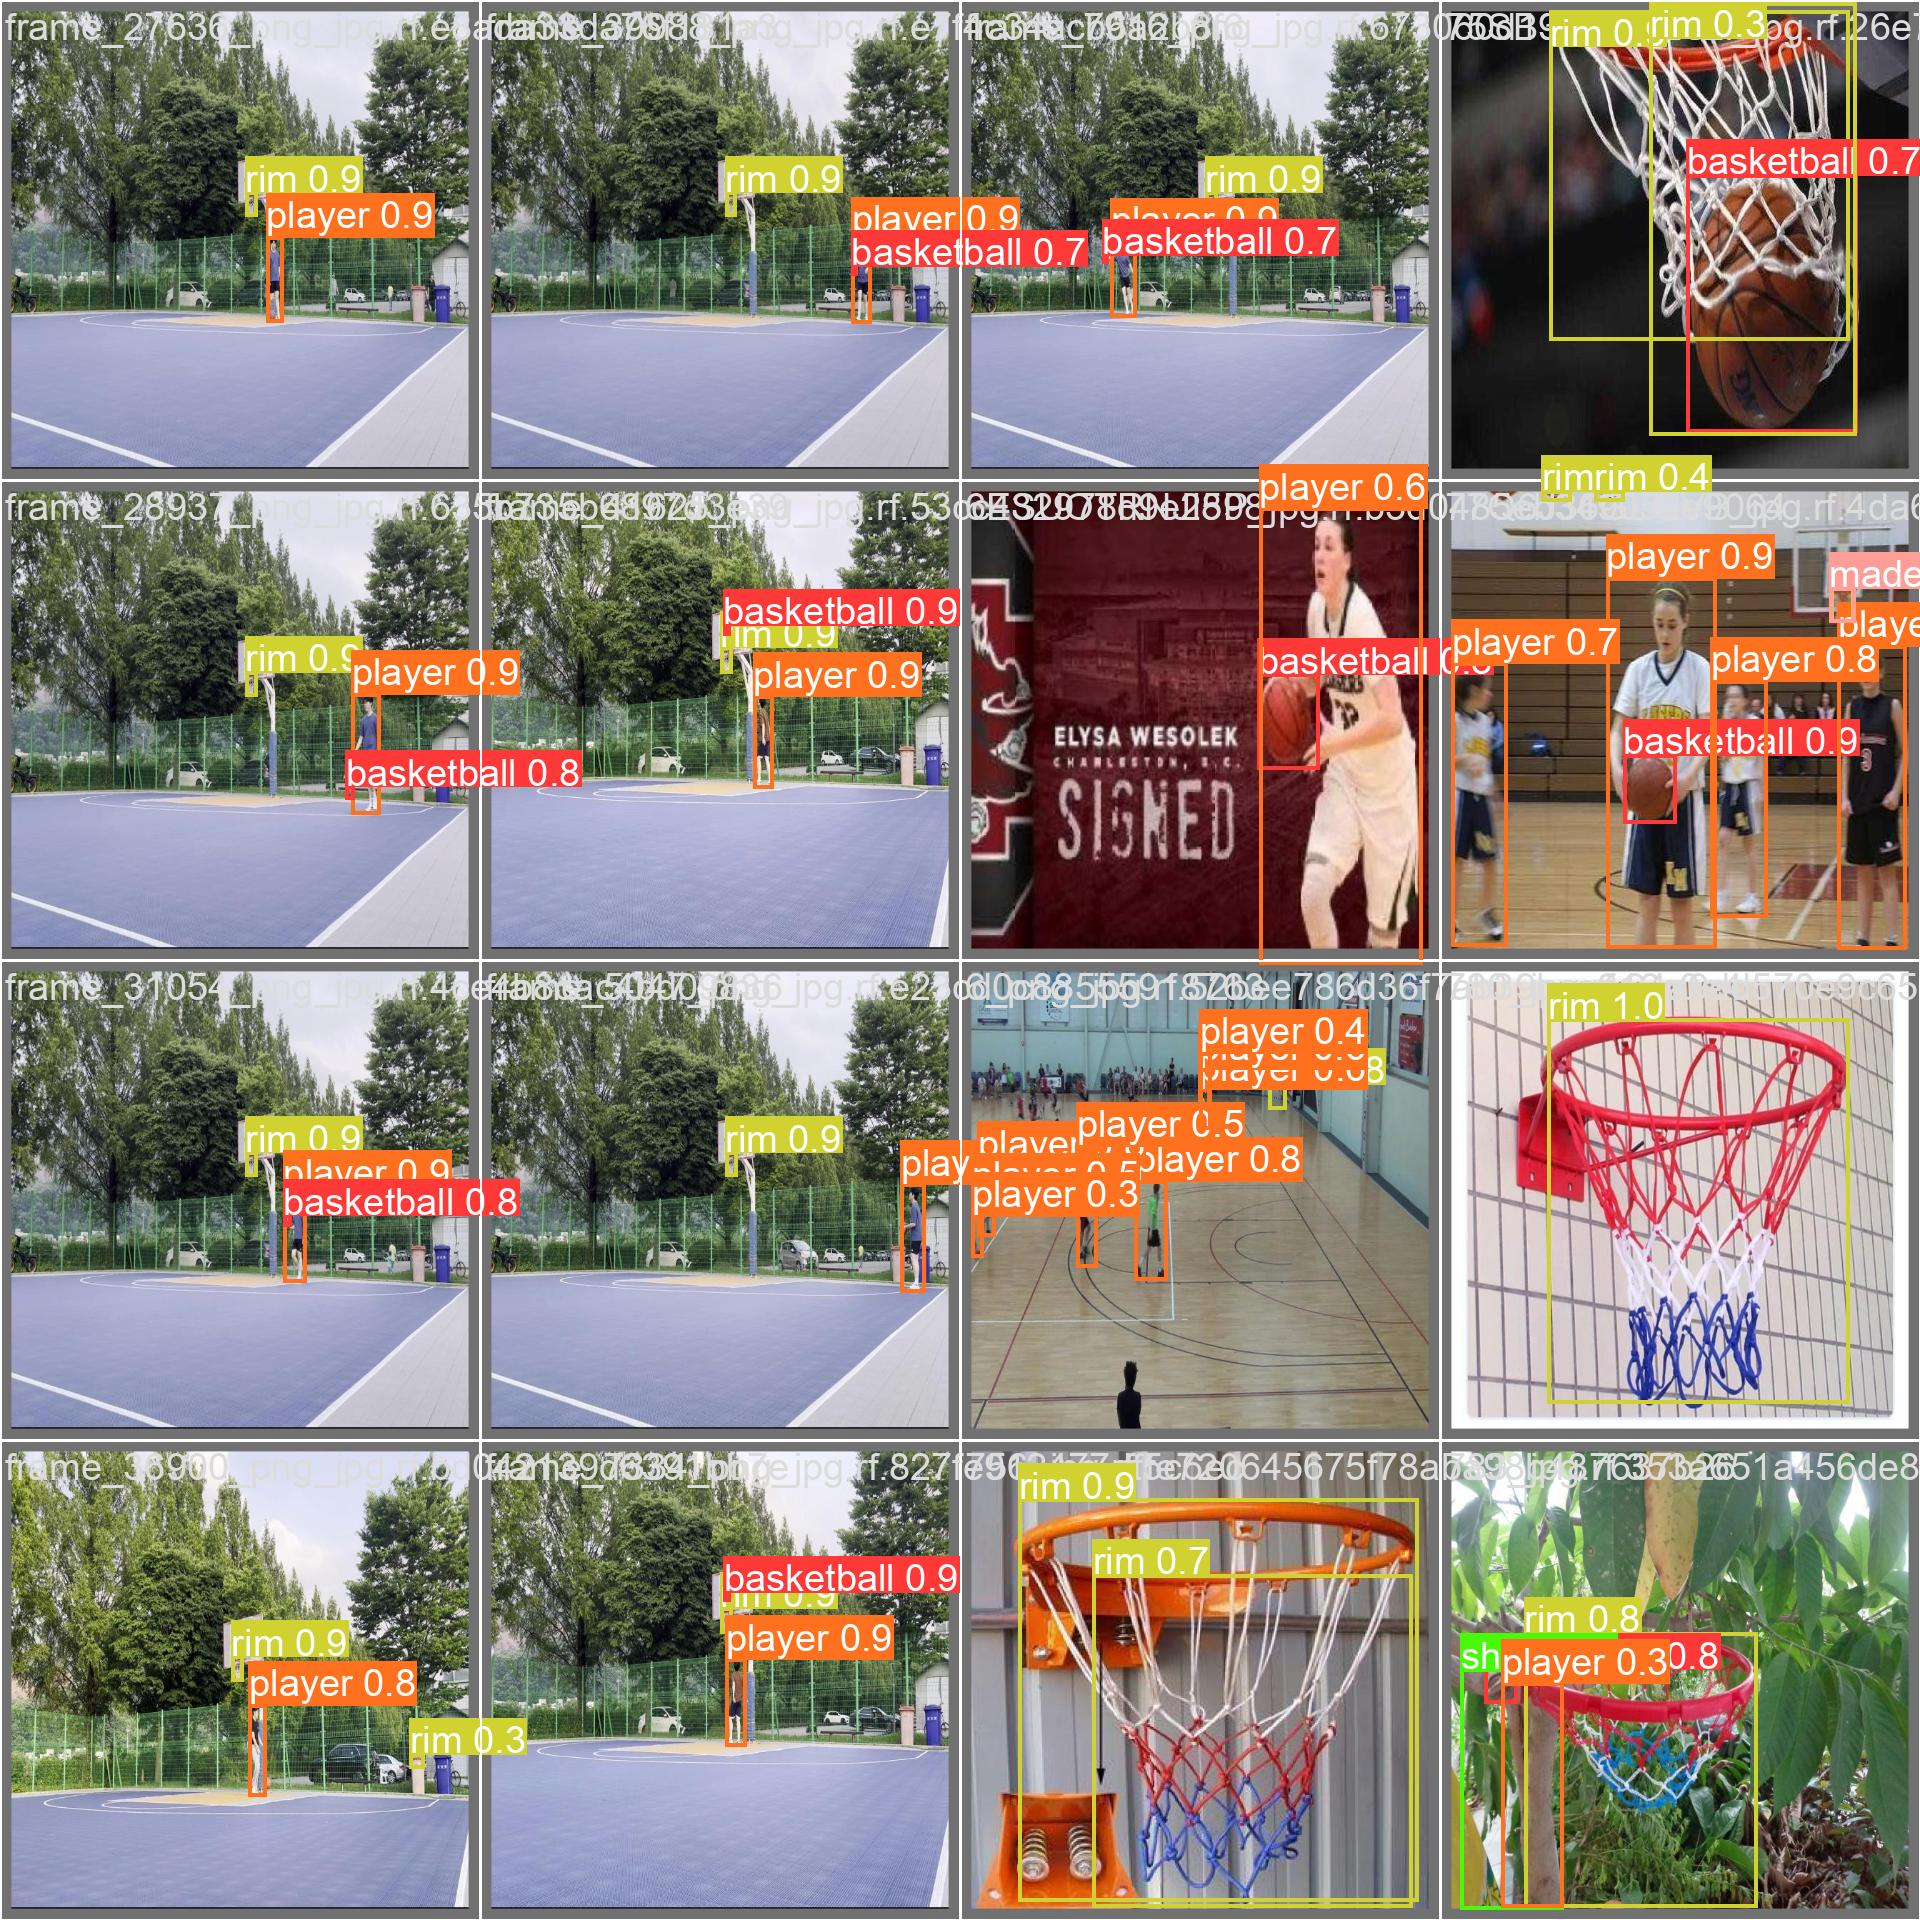

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=1000)

## Validate Custom Model

In [ ]:
# Validate on training data
model.val()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 268 layers, 68127420 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/datasets/BasketBall_Game-4/valid/labels.cache... 52 images, 1 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.22s/it]
                   all         52        564      0.629      0.707       0.72      0.432
            basketball         52         44      0.418      0.568       0.54      0.199
           made-basket         52          3      0.462      0.333      0.458      0.269
                player         52        414      0.798      0.983      0.956      0.642
                   ref         52        103     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e9e2622fbb0>
fitness: 0.46091036192139584
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.19886,     0.26942,     0.64244,     0.61758])
names: {0: 'basketball', 1: 'made-basket', 2: 'player', 3: 'ref'}
plot: True
results_dict: {'metrics/precision(B)': 0.6286746156559304, 'metrics/recall(B)': 0.7065886279425748, 'metrics/mAP50(B)': 0.7204254103724017, 'metrics/mAP50-95(B)': 0.43207535653795076, 'fitness': 0.46091036192139584}
save_dir: PosixPath('runs/detect/val')
speed: {'preprocess': 0.13987376139714167, 'inference': 43.26794697688176, 'loss': 0.0019715382502629207, 'postprocess': 12.999520852015568}

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 268 layers, 68129346 parameters, 0 gradients, 257.4 GFLOPs
100% 755k/755k [00:00<00:00, 27.9MB/s]
val: Scanning /content/datasets/BasketBall_Game-6/valid/labels... 140 images, 0 backgrounds, 0 corrupt: 100% 140/140 [00:00<00:00, 1258.44it/s]
val: New cache created: /content/datasets/BasketBall_Game-6/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0% 0/9 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-9

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO("/content/best.pt")

# Run inference on an image
results = model("/content/PLG.png")  # list of 1 Results object

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
masks


image 1/1 /content/PLG.png: 384x640 1 player, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
from google.colab import files
files.download('dataset.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Inference with Custom Model

In [ ]:
from google.colab import files
files.download('runs/detect/predict2/PLG_cut_v2_fixed.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 268 layers, 68127420 parameters, 0 gradients, 257.4 GFLOPs

image 1/18 /content/datasets/BasketBall_Game-3/test/images/0-03336666666666667_png.rf.9f4e9a42413fa6ee4f5e8e13b854b986.jpg: 384x640 10 players, 3 refs, 143.5ms
image 2/18 /content/datasets/BasketBall_Game-3/test/images/0-9009_png.rf.565a385b24e1730735aa078bb372ab75.jpg: 384x640 1 basketball, 12 players, 3 refs, 11.3ms
image 3/18 /content/datasets/BasketBall_Game-3/test/images/1-0010000000000001_png.rf.5167dc9a74db8cdf527a07fd262f452d.jpg: 384x640 1 basketball, 10 players, 3 refs, 10.4ms
image 4/18 /content/datasets/BasketBall_Game-3/test/images/10-844166666666666_png.rf.cbe2cfe9b382cd48f76803836a39376a.jpg: 384x640 1 basketball, 10 players, 3 refs, 10.6ms
image 5/18 /content/datasets/BasketBall_Game-3/test/images/12-846166666666667_png.rf.23ea380c75a9ced148675d8cce797f3c.jpg: 384x640 1 basketball, 9 players,

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/best.pt conf=0.25 source=/content/Game_4.mp4 save=True agnostic_nms=True

串流輸出內容已截斷至最後 5000 行。
video 1/1 (5846/10842) /content/Game_4.mp4: 384x640 6 players, 10.3ms
video 1/1 (5847/10842) /content/Game_4.mp4: 384x640 5 players, 10.9ms
video 1/1 (5848/10842) /content/Game_4.mp4: 384x640 5 players, 12.8ms
video 1/1 (5849/10842) /content/Game_4.mp4: 384x640 5 players, 12.5ms
video 1/1 (5850/10842) /content/Game_4.mp4: 384x640 6 players, 14.0ms
video 1/1 (5851/10842) /content/Game_4.mp4: 384x640 6 players, 13.4ms
video 1/1 (5852/10842) /content/Game_4.mp4: 384x640 5 players, 12.6ms
video 1/1 (5853/10842) /content/Game_4.mp4: 384x640 4 players, 12.7ms
video 1/1 (5854/10842) /content/Game_4.mp4: 384x640 4 players, 12.5ms
video 1/1 (5855/10842) /content/Game_4.mp4: 384x640 5 players, 12.5ms
video 1/1 (5856/10842) /content/Game_4.mp4: 384x640 1 made, 4 players, 12.7ms
video 1/1 (5857/10842) /content/Game_4.mp4: 384x640 4 players, 12.6ms
video 1/1 (5858/10842) /content/Game_4.mp4: 384x640 5 players, 1 ref, 12.5ms
video 1/1 (5859/10842) /content/Game_4.mp4: 384x640 5 

In [ ]:
from google.colab import files
files.download('/content/runs/detect/predict/PLG_cut_v2_fixed.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('/content/runs/detect/train3/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**NOTE:** Let's take a look at few results.

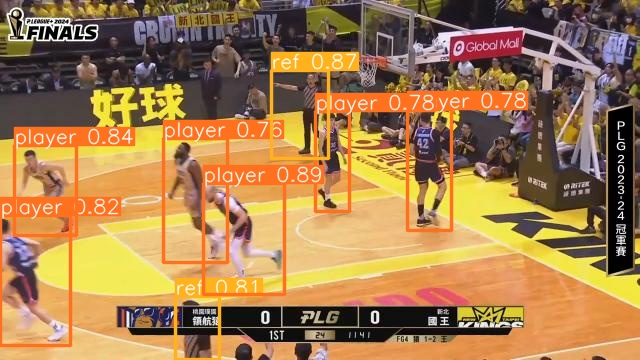

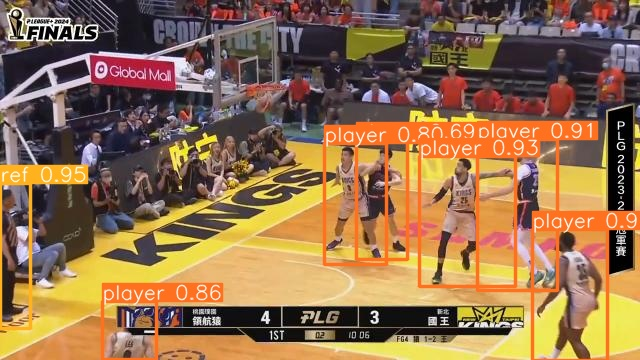

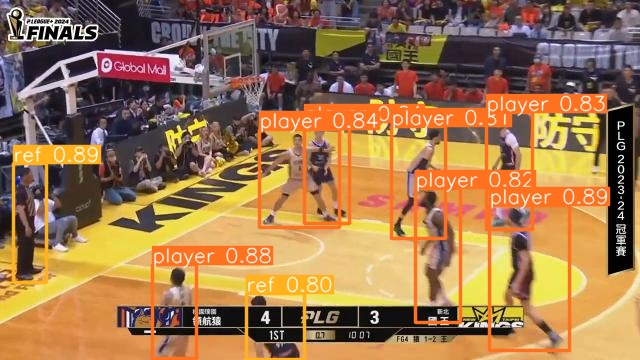

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
SOURCE_VIDEO_PATH=f'{HOME}/Game_4b.mp4'

In [ ]:
# Now try installing supervision again
!pip install supervision

from IPython import display
display.clear_output()

import supervision as sv
print("supervision.__version__:", sv.__version__)

supervision.__version__: 0.21.0


In [ ]:
MODEL = "/content/best.pt"

In [ ]:
from ultralytics import YOLO

model = YOLO(MODEL)
model.fuse()

Model summary (fused): 268 layers, 68129346 parameters, 0 gradients, 257.4 GFLOPs


In [ ]:
# dict maping class_id to class_name
CLASS_NAMES_DICT = model.model.names

# class_ids of interest - car, motorcycle, bus and truck
selected_classes = [2, 3,4, 5,6, 7]

In [ ]:
import supervision as sv
import numpy as np

SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


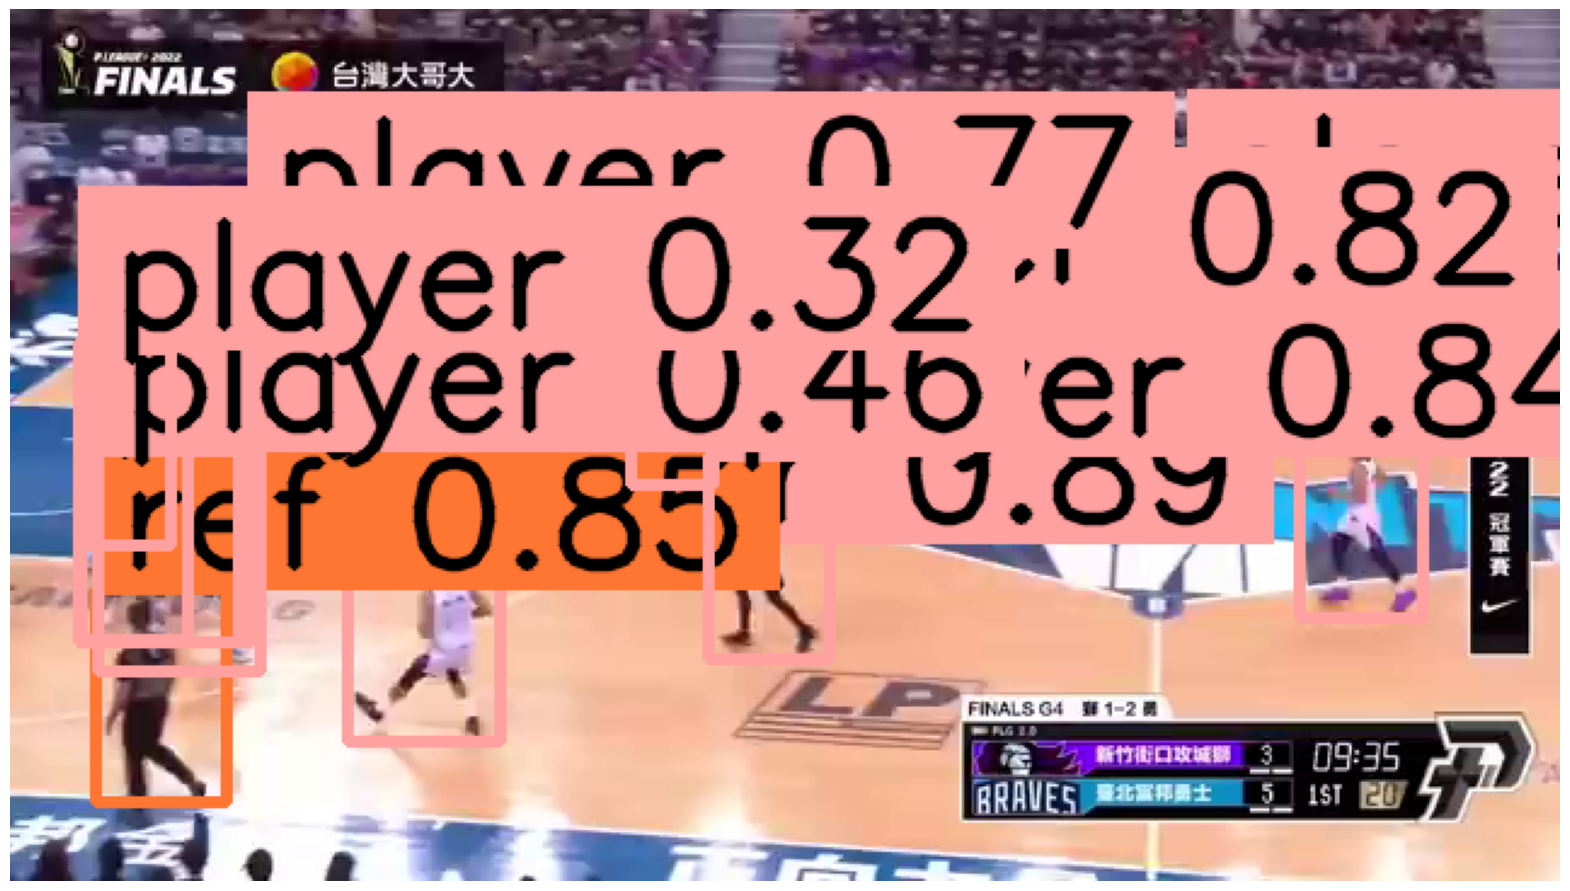

In [ ]:
# create frame generator
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
# create instance of BoxAnnotator
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# model prediction on single frame and conversion to supervision Detections
results = model(frame, verbose=False)[0]

# convert to Detections
detections = sv.Detections.from_ultralytics(results)
# only consider class id from selected_classes define above
detections = detections[np.isin(detections.class_id, selected_classes)]

# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for confidence, class_id in zip(detections.confidence, detections.class_id)
]

# annotate and display frame
anotated_frame=box_annotator.annotate(scene=frame, detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(anotated_frame, (20,20))

In [ ]:
# settings
LINE_START = sv.Point(50, 1500)
LINE_END = sv.Point(3840-50, 1500)

TARGET_VIDEO_PATH = f"{HOME}/Game_4_Tracker.mp4"

In [ ]:
sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=1280, height=720, fps=29, total_frames=1735)

In [ ]:
# create BYTETracker instance
byte_tracker = sv.ByteTrack(track_thresh=0.25, track_buffer=30, match_thresh=0.8, frame_rate=30)

# create VideoInfo instance
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

# create frame generator
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# create LineZone instance, it is previously called LineCounter class
line_zone = sv.LineZone(start=LINE_START, end=LINE_END)

# create instance of BoxAnnotator
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)

# create instance of TraceAnnotator
trace_annotator = sv.TraceAnnotator(thickness=4, trace_length=50)

# create LineZoneAnnotator instance, it is previously called LineCounterAnnotator class
line_zone_annotator = sv.LineZoneAnnotator(thickness=4, text_thickness=4, text_scale=2)

# define call back function to be used in video processing
def callback(frame: np.ndarray, index:int) -> np.ndarray:
    # model prediction on single frame and conversion to supervision Detections
    results = model(frame, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    # only consider class id from selected_classes define above
    detections = detections[np.isin(detections.class_id, selected_classes)]
    # tracking detections
    detections = byte_tracker.update_with_detections(detections)
    labels = [
        f"#{tracker_id} {model.model.names[class_id]} {confidence:0.2f}"
        for confidence, class_id, tracker_id
        in zip(detections.confidence, detections.class_id, detections.tracker_id)
    ]
    annotated_frame = trace_annotator.annotate(
        scene=frame.copy(),
        detections=detections
    )
    annotated_frame=box_annotator.annotate(
        scene=annotated_frame,
        detections=detections,
        labels=labels)

    # update line counter
    line_zone.trigger(detections)
    # return frame with box and line annotated result
    return  line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)

# process the whole video
sv.process_video(
    source_path = SOURCE_VIDEO_PATH,
    target_path = TARGET_VIDEO_PATH,
    callback=callback
)

SupervisionWarnings: `track_buffer` in `ByteTrack.__init__` is deprecated and will be remove in `supervision-0.23.0`. Use 'lost_track_buffer' instead.
SupervisionWarnings: `track_thresh` in `ByteTrack.__init__` is deprecated and will be remove in `supervision-0.23.0`. Use 'track_activation_threshold' instead.
SupervisionWarnings: `match_thresh` in `ByteTrack.__init__` is deprecated and will be remove in `supervision-0.23.0`. Use 'minimum_matching_threshold' instead.
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead
Supe

In [ ]:
from google.colab import files
files.download("vehicle-counting-result-with-counter.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
a=np.array([[2,3,6],[1,1,1],[1,4,5]])

print(a)
print(np.linalg.det(a))
print(np.linalg.inv(a))


[[2 3 6]
 [1 1 1]
 [1 4 5]]
8.000000000000002
[[ 0.125  1.125 -0.375]
 [-0.5    0.5    0.5  ]
 [ 0.375 -0.625 -0.125]]
